In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv(r"Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


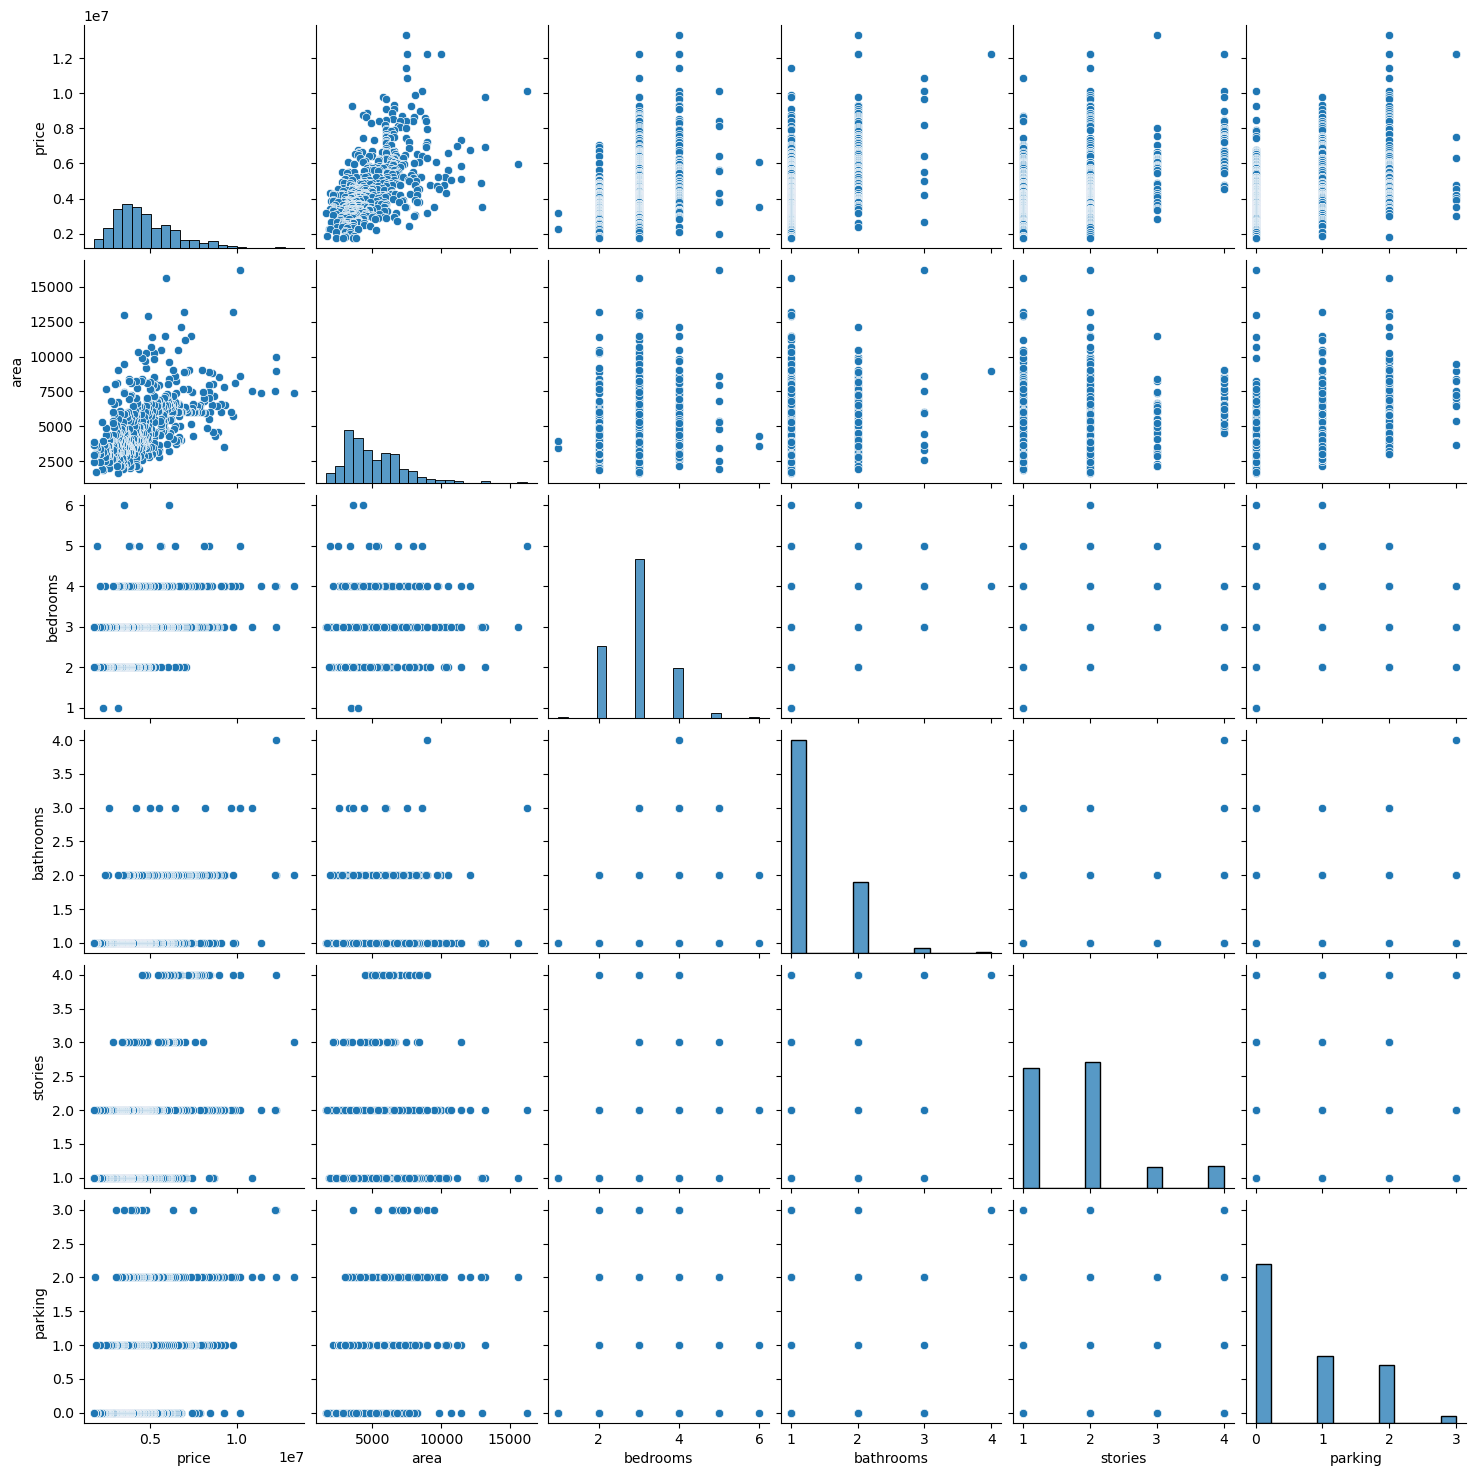

In [7]:
import seaborn as sn
sn.pairplot(data)

In [8]:
data.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [9]:
sn.heatmap(data=data.corr())

<AxesSubplot:>

In [10]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

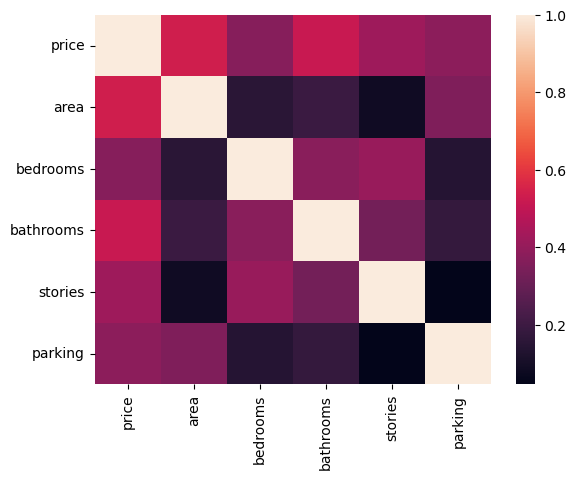

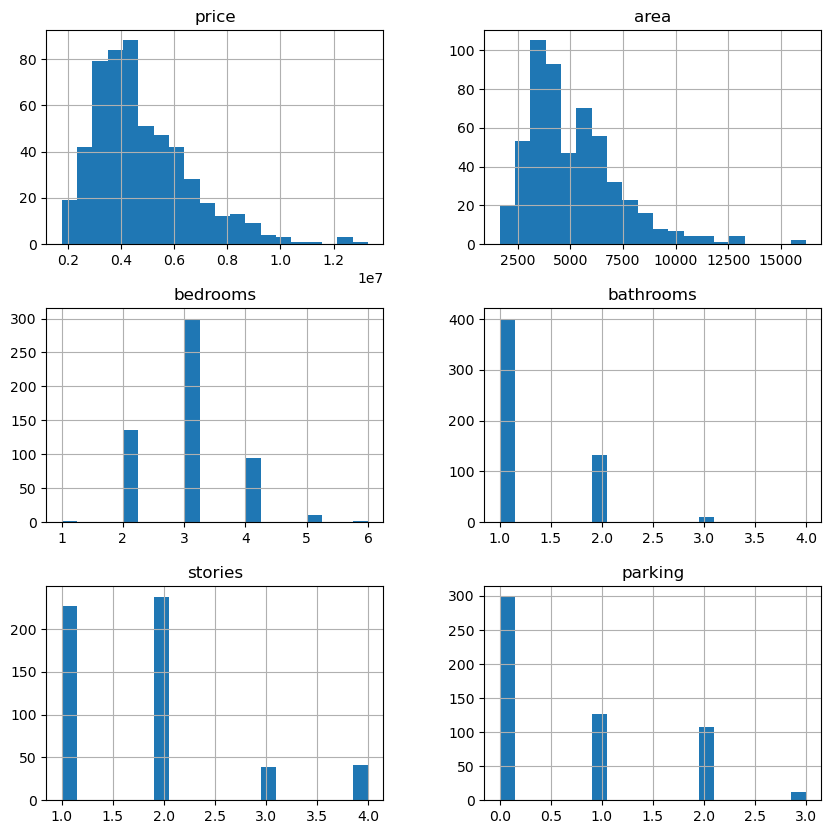

In [11]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder


attributes = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
lc = LabelEncoder()

for attribute in attributes:
   
    encoded_data = lc.fit_transform(data[attribute])
    
    
    data[attribute] = encoded_data

    

In [13]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='price')
Y=data['price']


In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
print("Coeffiecents",lr.coef_)



Coeffiecents [ 2.43112443e+02  1.74456880e+05  8.83027090e+05  4.37894457e+05
  4.38466652e+05  2.92271063e+05  4.34009214e+05  8.62554293e+05
  9.27962552e+05  2.91578605e+05  7.25893774e+05 -2.11050847e+05]


In [17]:
print("Intercept=",lr.intercept_)

Intercept= 55474.65528840572


In [18]:

y_pred=lr.predict(x_test)
y_pred

array([ 2681363.80081242,  3664373.09868585,  5944784.33819429,
        3841290.3292573 ,  6540181.85551977,  7034192.18931345,
        3613640.7316228 ,  3082343.00523046,  5343902.75371359,
        3135549.10880458,  5016449.30891749,  2186921.99909703,
        4214851.66446707,  4523836.41418271,  6681379.07068126,
        2658705.41671233,  7309664.30136866,  6432084.85189716,
        5153007.40581799,  4307609.24103489,  2624173.08870131,
        2010665.47793779,  5892660.52046593,  5321068.26740852,
        6817985.50543877,  6166561.67354788,  3624442.64301921,
        3725764.51466715,  3651069.31345717,  3753191.86963565,
        4457507.12870466,  5114772.64658282,  5441605.33083129,
        5512605.58577106,  7471543.90549097,  5126378.71309698,
        6687268.23200342,  2381713.5582132 ,  5394949.66847379,
        5465189.85764973,  4941284.73567678,  5324453.27770903,
        2937496.1203979 ,  6491566.55469016,  5928808.79846545,
        7785051.12896919,  8407415.77414

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score, mean_absolute_error,mean_squared_error
print("R2 score",r2_score(y_test,y_pred))

R2 score 0.7331102153370126


In [24]:
Output=[7420,4,2,3,1,0,0,0,1,2,1,0]
print("Prediction:",lr.predict([Output]))

Prediction: [8312414.24082199]


In [21]:
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 697326.1696332141
MSE: 750408716892.2812
RMSE: 866261.3444522856


In [22]:
pd.DataFrame(np.c_[y_test ,y_pred] , columns =['Actual' , 'Predicted(Linear Regression)'])

,Actual,Predicted(Linear Regression)
0,2940000.0,2.681364e+06
1,4095000.0,3.664373e+06
2,3570000.0,5.944784e+06
3,2870000.0,3.841290e+06
4,7700000.0,6.540182e+06
...,...,...
104,6293000.0,6.933346e+06
105,4165000.0,4.140133e+06
106,3500000.0,4.031181e+06
107,4865000.0,3.233223e+06
